# 1) probelm statement
To understand how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

# 2) Data Collection
reference- https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

dataset contains 8 features and 1000 records 

# 3) Data Informations

gender          : sex of studets -> (female, male)

race/ethnicity  : ethnicity of students -> (group A, group B, group C, group D, group E)

parental level of education : parents final eduacation -> (bachelor's degree, some college, master's degree,associate's degree, high school, some high school)

lunch : having lunch before test -> (standard, free/reduced)

test preparation course : -> (nont complete, complete)



math score : integer value between 1 - 100

reading score : integer value between 1 - 100

writing score : integer value between 1 - 100


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

#  4) Date Checks
1) check for missing value

2) check for duplicates


3) check data type  

4) check no. of unique categories in each columns


5) discriptive statitics

6) Check various categories present in the different categorical column

 segrregate numerical and categorical features

 Aggregate the total score with mean

In [40]:
# 1. check for missing value
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [41]:
# 1. observation of check for missing value  - there is no missing value

In [42]:
# 2) check for duplicates
df.duplicated().sum()

0

In [43]:
# 2. observation of check for duplicates - there is no duplicate records

In [44]:
# 3. check data type  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [49]:
# or
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [50]:
# 3. observation of checking data type  
# there are manily to type of datatype used - object and int64
# 5 object type features - gender,race/ethnicity,parental level of education,lunch,test preparation course        
# 3 int type features - math score,reading score,writing score

In [51]:
# 4. check no. of unique categories in each columns
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [53]:
# we understood
# 5 object type features - gender,race/ethnicity,parental level of education,lunch,test preparation course        
# 3 int type features - math score,reading score,writing score

# in here gender,lunch,test preparation course - just having 2 type of values
# race/ethnicity,parental level of education - more than 2 type of values
# other values are scores which have more than 70+ values depends on students


In [54]:
# 5. discriptive statitics
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [56]:
# 5. observation of discriptive statitics
# -the mean of every test score is approximately same (between 66.08900 and 69.169000) which resembles it is an normal distribution
# -the std is also approximately same for every test score (between 14.600192 and 15.195657)which resembles, spread is also equal 
# -math score has minimum of 0 , may be some students feel difficult to study maths, but mean is similar to other subject

In [85]:
# 6. Check various categories present in the different categorical column
[feature + ' -> ' + str(df[feature].unique()) for feature in df.columns if df[feature].dtype=='O']


["gender -> ['female' 'male']",
 "race/ethnicity -> ['group B' 'group C' 'group A' 'group D' 'group E']",
 'parental level of education -> ["bachelor\'s degree" \'some college\' "master\'s degree" "associate\'s degree"\n \'high school\' \'some high school\']',
 "lunch -> ['standard' 'free/reduced']",
 "test preparation course -> ['none' 'completed']"]

In [90]:
# 7. seggregating numerical features and categorical features
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
categorical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [91]:
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']
numerical_features

['math score', 'reading score', 'writing score']

In [94]:
# 8. aggregating average to dataset
df['total_score']=df['math score']+df['reading score']+df['writing score']
df['average']=df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


# 5) visualization

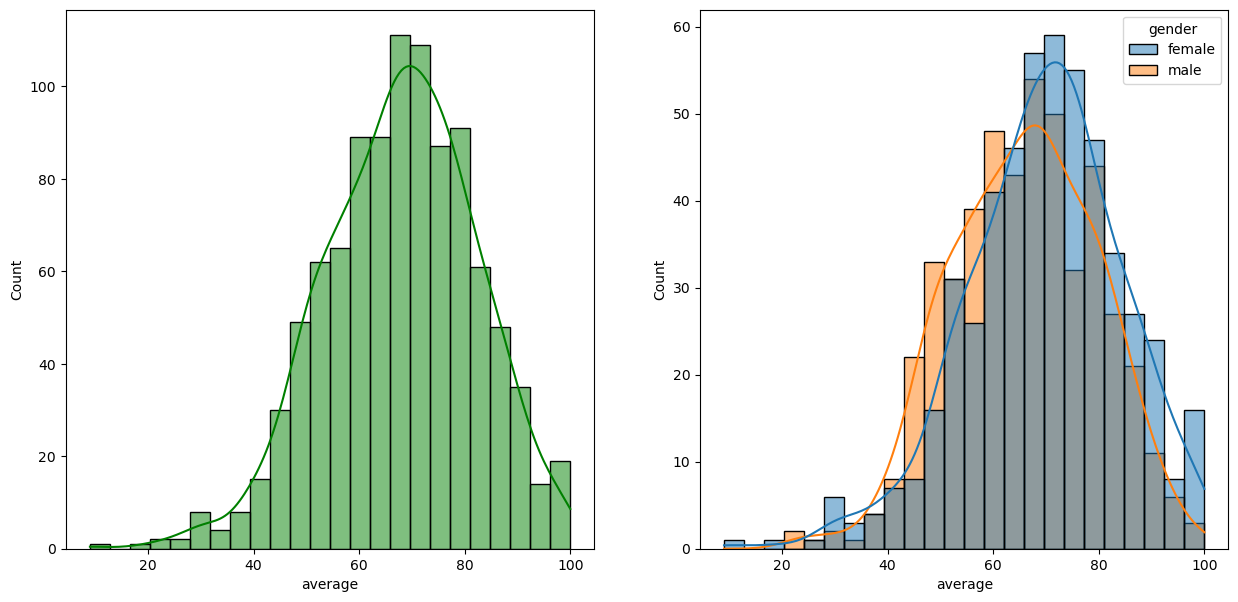

In [119]:
# 1) how gender impacts test score
fig,axis = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(x='average',data=df,kde=True,color='g')
plt.subplot(122)
sns.histplot(x='average',data=df,hue='gender',kde=True)
plt.show()

In [107]:
# 1) observation- how gender impacts test score
# generally ,female is perform better than males

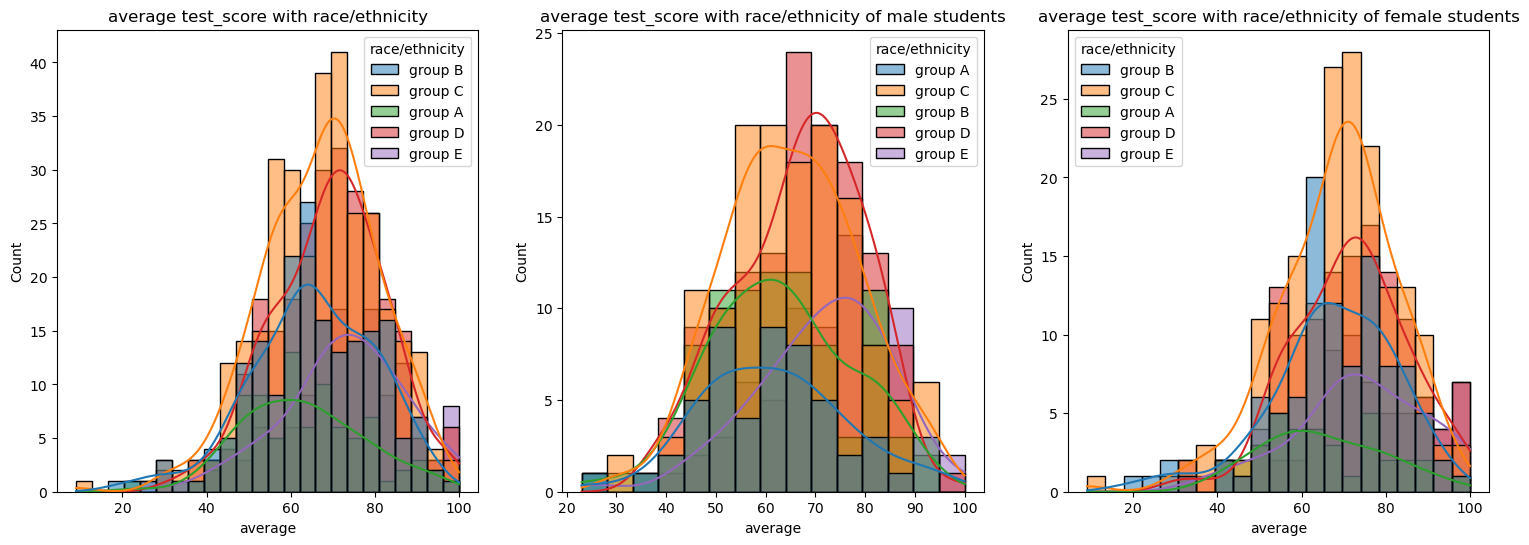

In [143]:
# 2. how race/ethnicity impacts test_score
fig,axis = plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
plt.title('average test_score with race/ethnicity')
sns.histplot(x='average',data=df,hue='race/ethnicity',kde=True)
plt.subplot(142)
plt.title('average test_score with race/ethnicity of male students')
sns.histplot(x='average',data=df[df['gender']=='male'],hue='race/ethnicity',kde=True)
plt.subplot(143)
plt.title('average test_score with race/ethnicity of female students')
sns.histplot(x='average',data=df[df['gender']=='female'],hue='race/ethnicity',kde=True)
plt.show()

In [147]:
# observation - 2. how race/ethnicity impacts test_score
# -generally group-c race/ethnicity scored high and group-A perform low
# -but for male students, group-D race/ethnicity scored high

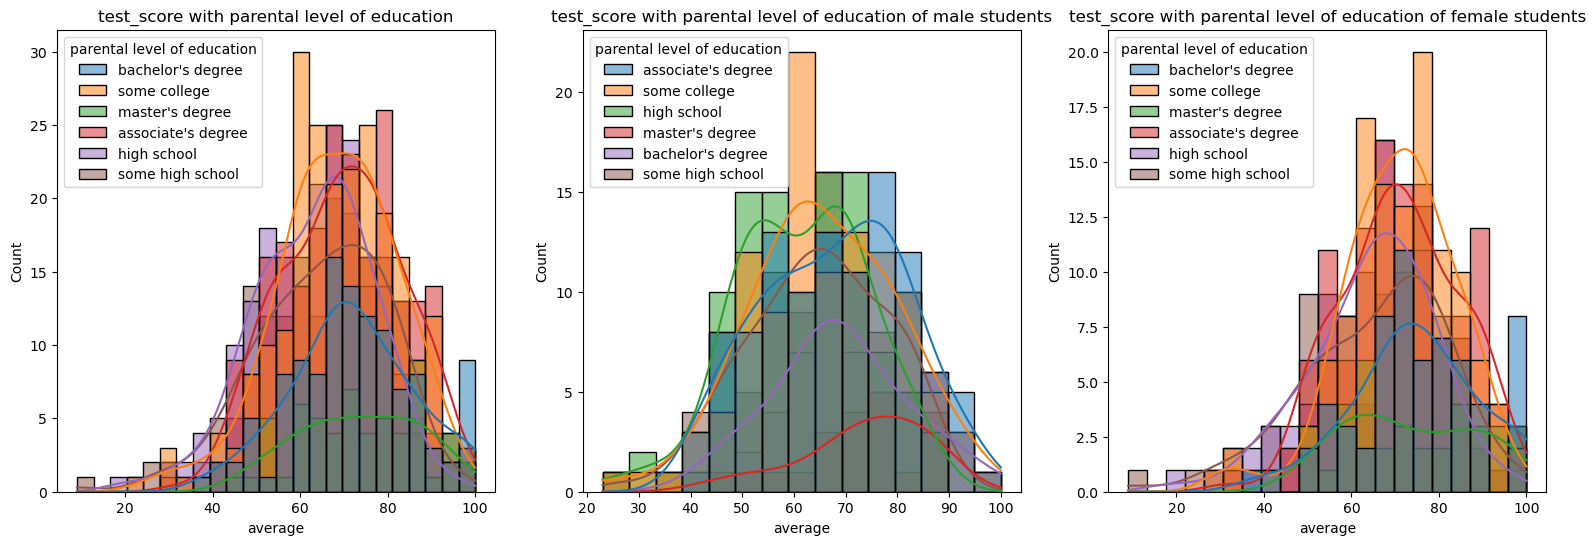

In [158]:
# 3. how parental level of education impact on test_score
fig,axis = plt.subplots(1,3,figsize=(26,6))
plt.subplot(141)
plt.title('test_score with parental level of education')
sns.histplot(x='average',data=df,hue='parental level of education',kde=True)
plt.subplot(142)
plt.title('test_score with parental level of education of male students')
sns.histplot(x='average',data=df[df['gender']=='male'],hue='parental level of education',kde=True)
plt.subplot(143)
plt.title('test_score with parental level of education of female students')
sns.histplot(x='average',data=df[df['gender']=='female'],hue='parental level of education',kde=True)
plt.show()

In [159]:
#observation- 3. how parental level of education impact on test_score
#- parental level of education doesn't impact on test_score

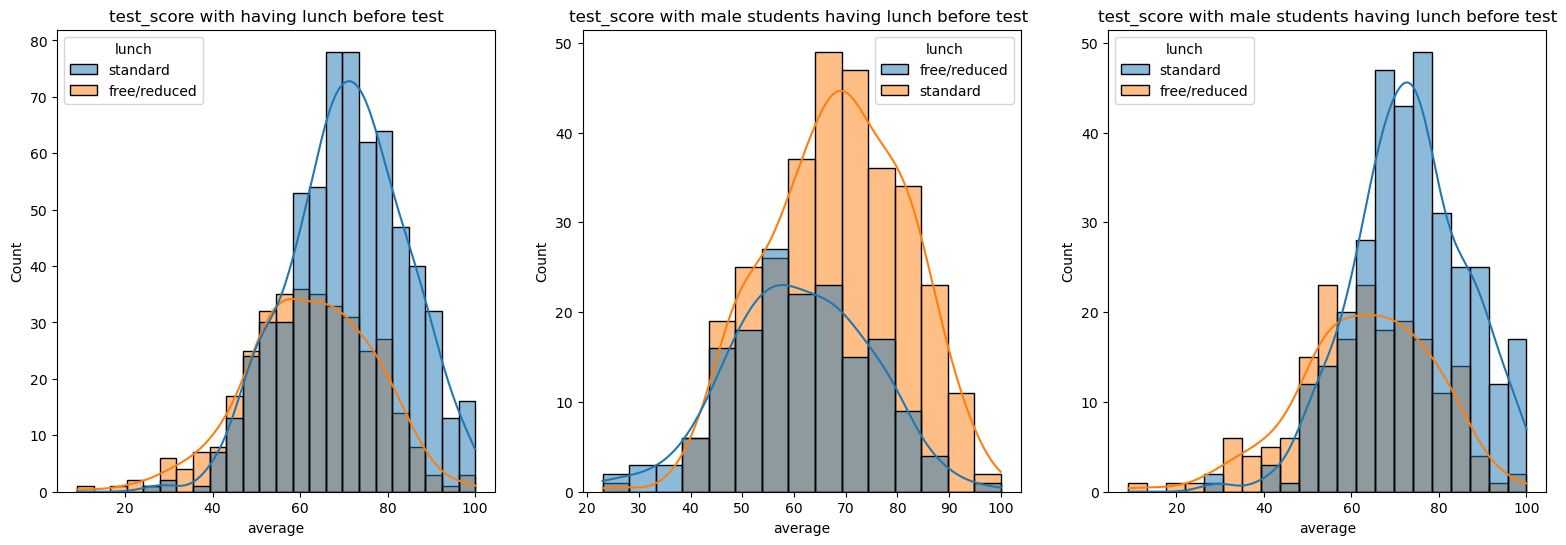

In [165]:
# 4. how having lunch before test impact on test_score

fig,axis = plt.subplots(1,3,figsize=(26,6))
plt.subplot(141)
plt.title('test_score with having lunch before test')
sns.histplot(x='average',data=df,hue='lunch',kde=True)
plt.subplot(142)
plt.title('test_score with male students having lunch before test ')
sns.histplot(x='average',data=df[df['gender']=='male'],hue='lunch',kde=True)
plt.subplot(143)
plt.title('test_score with male students having lunch before test')
sns.histplot(x='average',data=df[df['gender']=='female'],hue='lunch',kde=True)
plt.show()

In [166]:
# observation -4. how having lunch before test impact on test_score
# -having lunch helps to perform well for every students

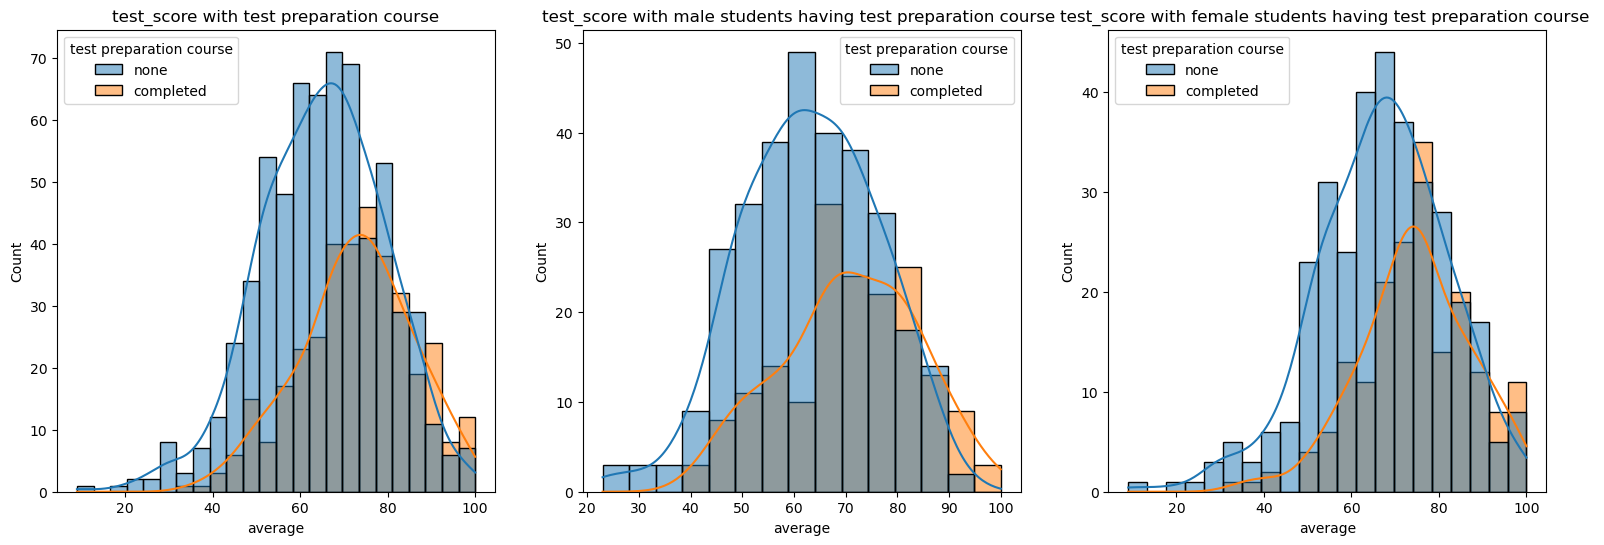

In [170]:
# 5. how test preparation course impact on test_score
fig,axis = plt.subplots(1,3,figsize=(26,6))
plt.subplot(141)
plt.title('test_score with test preparation course')
sns.histplot(x='average',data=df,hue='test preparation course',kde=True)
plt.subplot(142)
plt.title('test_score with male students having test preparation course ')
sns.histplot(x='average',data=df[df['gender']=='male'],hue='test preparation course',kde=True)
plt.subplot(143)
plt.title('test_score with female students having test preparation course ')
sns.histplot(x='average',data=df[df['gender']=='female'],hue='test preparation course',kde=True)
plt.show()

In [171]:
# observation -5. how test preparation course impact on test_score
# completing test preparation course does not impact on test_score

# 6. correlation

In [175]:
df.corr()

,math score,reading score,writing score,total_score,average
math score,1.000000,0.817580,0.802642,0.918746,0.918746
reading score,0.817580,1.000000,0.954598,0.970331,0.970331
writing score,0.802642,0.954598,1.000000,0.965667,0.965667
total_score,0.918746,0.970331,0.965667,1.000000,1.000000
average,0.918746,0.970331,0.965667,1.000000,1.000000


<Axes: >

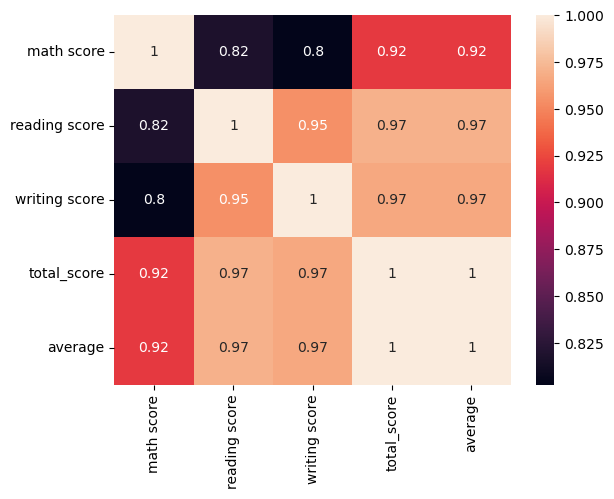

In [180]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
# observation - reading score and writing score is highly correlated